In [218]:
import sklearn
import numpy as np
import csv
import tensorflow as tf
%matplotlib inline
from tensorflow.keras.models import Sequential
from keras import regularizers

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.activations import linear, relu, sigmoid
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [219]:
#process all data into matrixs

with open('C:/Users/Nathan/Desktop/Computer Class/DeepLearning.AI/ML project/DC link to scrap/X control.csv', 'r') as f:
    reader = csv.reader(f)
    headers = next(reader, None)
    data = list(reader)
X_raw = np.array(data, dtype=float)

with open('C:/Users/Nathan/Desktop/Computer Class/DeepLearning.AI/ML project/DC link to scrap/y dirt.csv', 'r') as f2:
    reader2 = csv.reader(f2)
    headers2 = next(reader2, None)
    data2 = list(reader2)
y_raw = np.array(data2, dtype=float)

len = X_raw.shape[0]
col = X_raw.shape[1]

#break dataset into 2 groups, train, test
X_train, X_test, y_train, y_test = train_test_split(X_raw,y_raw,test_size=0.33, random_state = 1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16505, 12)
(16505, 1)
(8130, 12)
(8130, 1)


In [220]:
def getPlotX( paramNumber , log_ ): #pass in the colum you want (parameter 0 = temperature, etc. )
    fig_, ax_ = plt.subplots(figsize=(15,3))
    #ax.plot(X_raw, y_raw, "--", color = "orangered", label="y_ideal", lw=1)
    ax_.set_title(f"Training data for {headers[paramNumber]}",fontsize = 14)
    ax_.set_xlabel("bin")
    if log_ == 'log':
        ax_.set_ylabel(f"log({headers[paramNumber]})")
        ax_.set_yscale('log')
    else:
        ax_.set_ylabel(f"{headers[paramNumber]}")

    
    ax_.hist(X_train[:,paramNumber], label=f"{headers[paramNumber]}" , bins = 50)
    print( X_train[:,paramNumber] )
    #ax.legend(loc='upper left')
    return fig_ , ax_

[107.  87.  86. ...  99. 155.  92.]


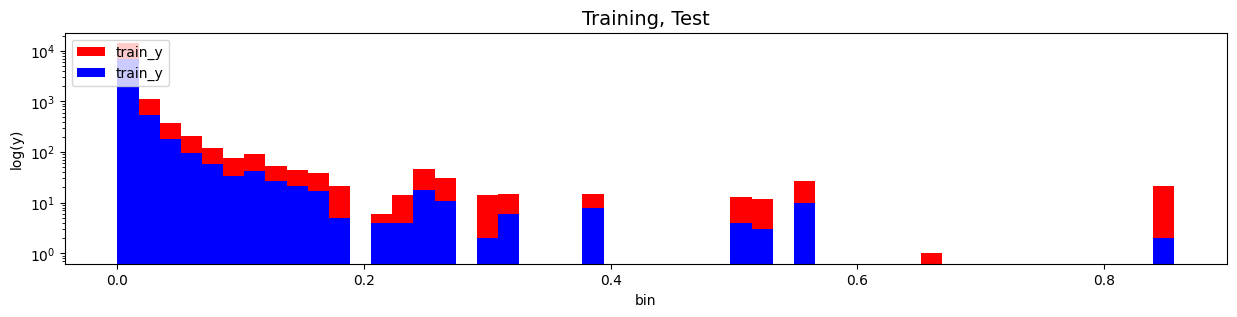

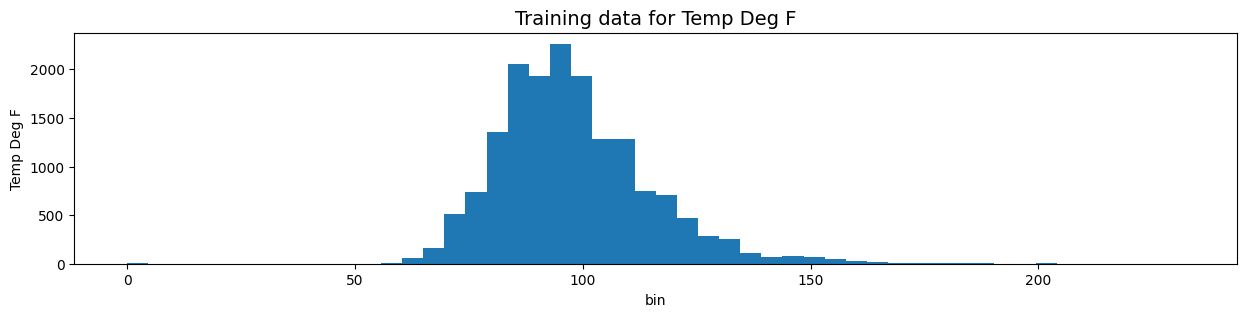

[50. 45. 52. ... 45. 48. 46.]


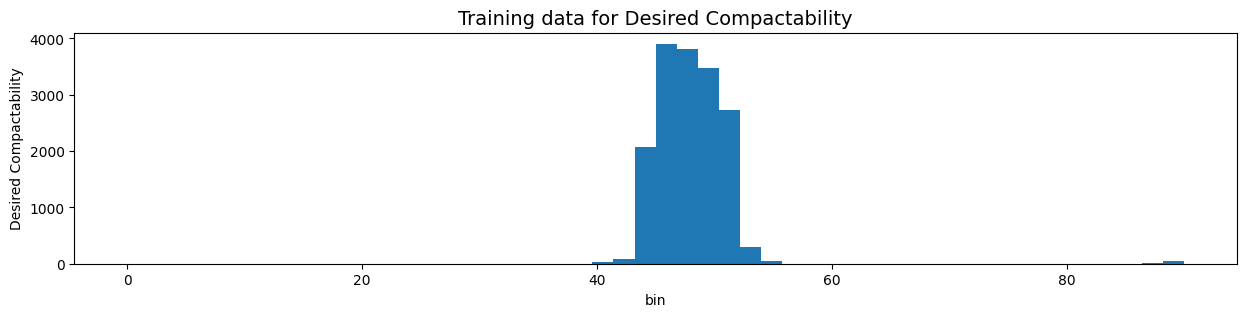

[48. 46. 52. ... 43. 47. 46.]


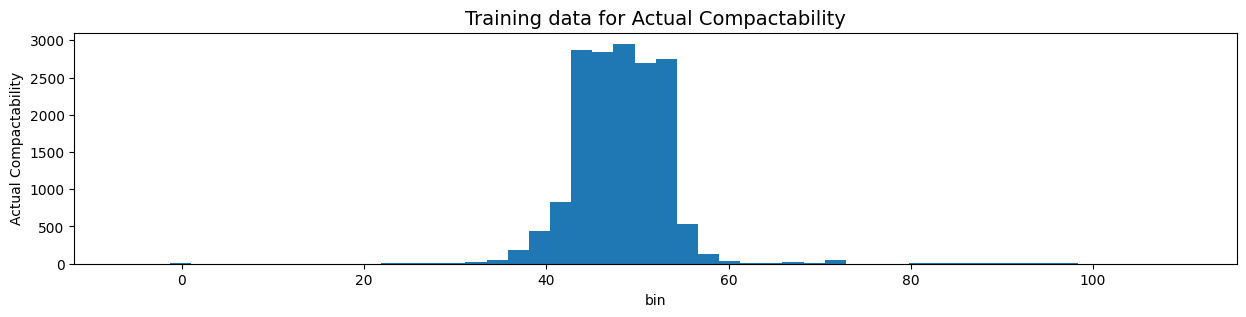

[ 91.  74.  74. ...  86. 108.  77.]


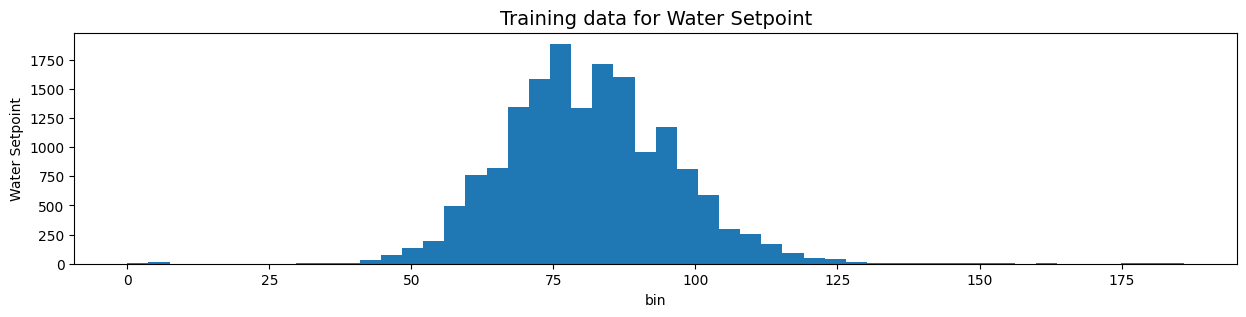

[ 92.  74.  74. ...  86. 108.  76.]


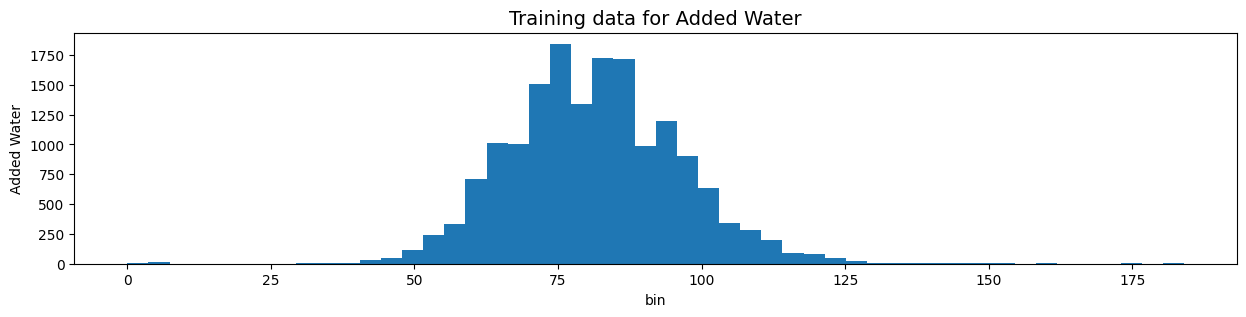

[ 8. 20. 22. ... 22. -5. 24.]


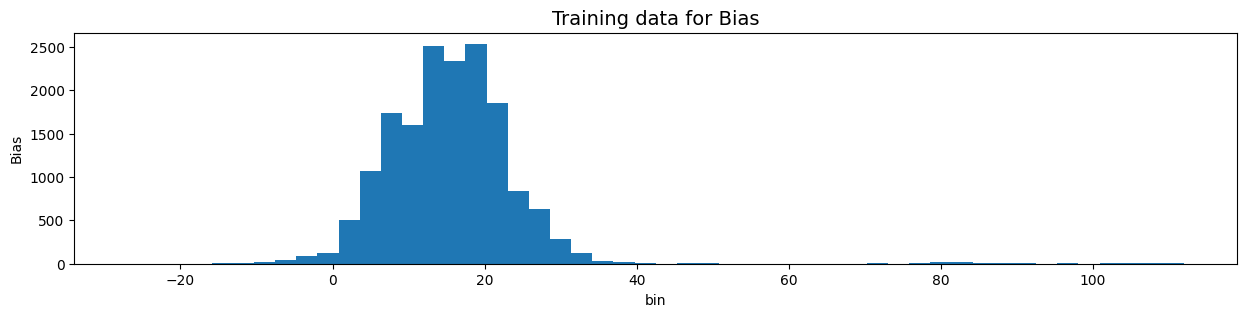

[181. 199. 243. ... 172. 169. 233.]


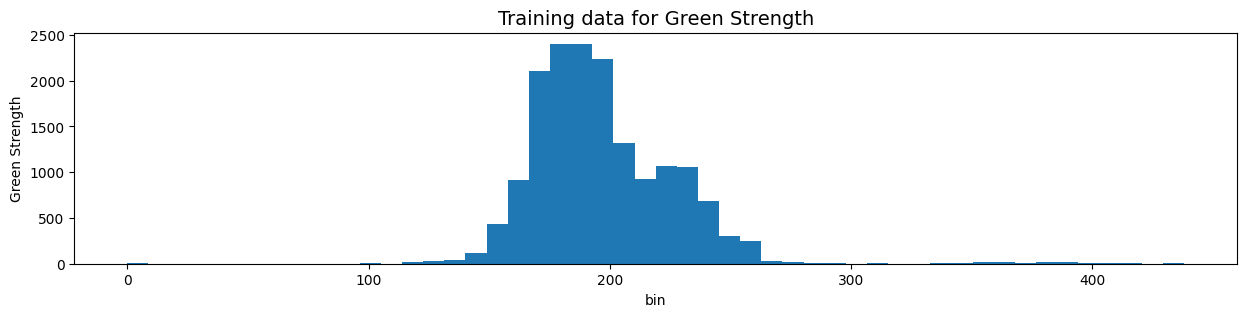

[335. 303. 314. ... 316. 354. 325.]


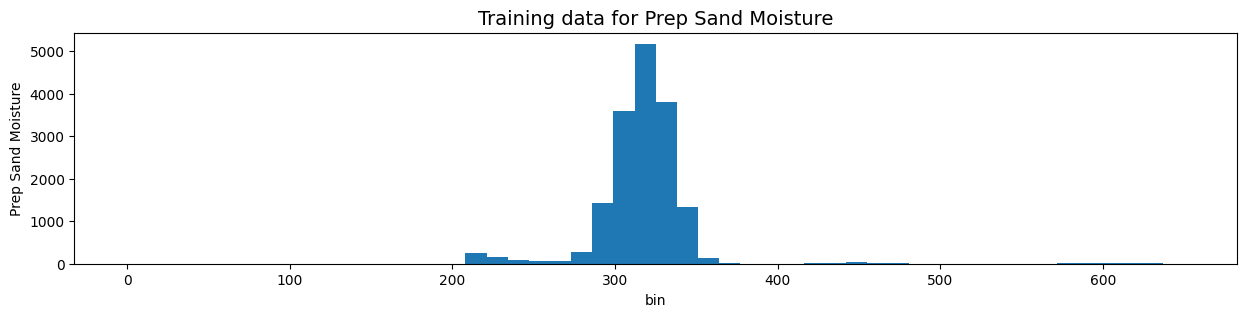

[199. 128. 156. ... 161. 201. 225.]


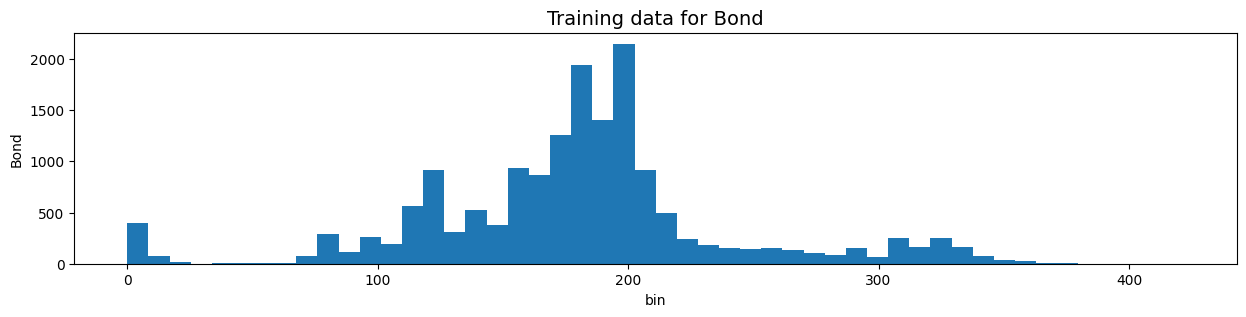

[628. 606. 676. ... 595. 649. 670.]


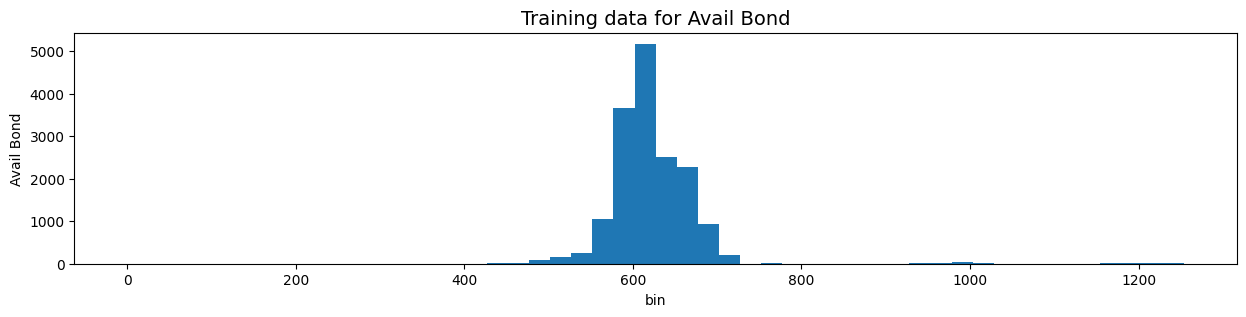

[2841. 2684. 2367. ... 2624. 2767. 2634.]


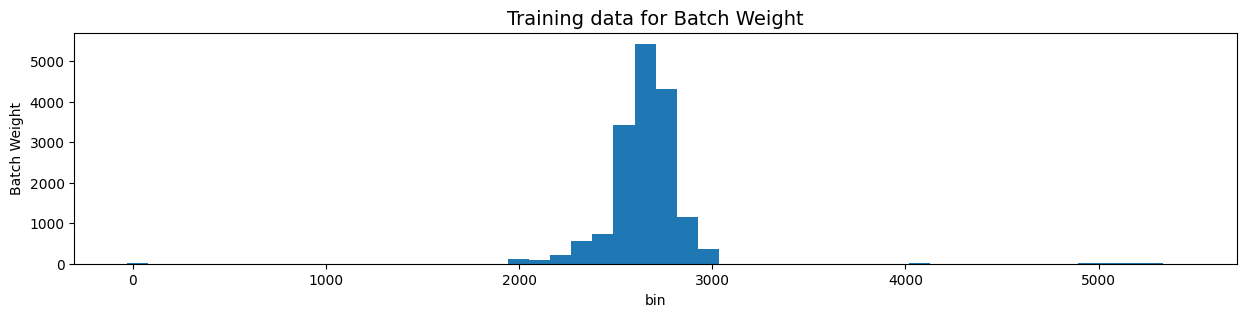

[162. 166. 148. ... 161. 159. 145.]


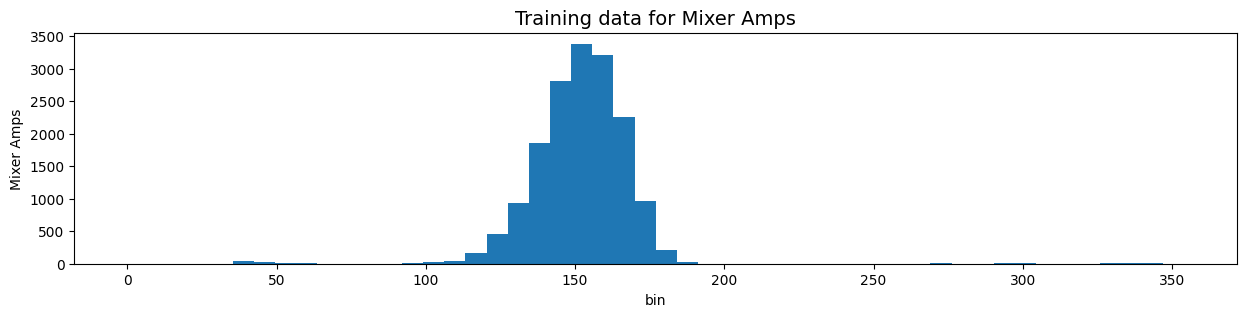

In [221]:
fig, ax = plt.subplots(1,1,figsize=(15,3))
#ax.plot(X_raw, y_raw, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("bin")
ax.set_ylabel("log(y)")
#ax.autoscale()
ax.set_yscale('log')

ax.hist(y_train, color = "red",           label="train_y" , bins = 50)
ax.hist(y_test, color = "blue",           label="train_y" , bins = 50)
ax.legend(loc='upper left')


for i in range(X_train.shape[1]):
    fig_p0, ax_p0 = getPlotX(i , '')
    plt.show()





In [222]:
def makeModel ( lambda_ , numLayers , numPolynomial ) :
    # suggest lambda < 10 
    # suggest numLayers < 6 
    # suggest numPolynomial < 64 , greater than 16 for 5 layer function
    layer_1 = Dense(int(numPolynomial/2), activation = 'relu'      ,    kernel_regularizer=regularizers.L2(lambda_))
    layer_2 = Dense(int(numPolynomial/2), activation = 'relu'      ,    kernel_regularizer=regularizers.L2(lambda_))
    layer_3 = Dense(int(numPolynomial/4), activation = 'relu'      ,    kernel_regularizer=regularizers.L2(lambda_))
    layer_4 = Dense(int(numPolynomial/8), activation = 'sigmoid'      ,    kernel_regularizer=regularizers.L2(lambda_))                
    layer_5 = Dense(1,  activation = 'relu'   ,    kernel_regularizer=regularizers.L2(lambda_))

    if numLayers == 2:
        model = Sequential( [ layer_1, layer_5 ] )
    elif numLayers == 3:
        model = Sequential( [ layer_1, layer_2, layer_5 ] )
    elif numLayers == 4:
        numLayers = Sequential( [ layer_1, layer_2, layer_3, layer_5 ] )
    elif numLayers == 5:
        numLayers = Sequential( [ layer_1, layer_2, layer_3, layer_4, layer_5 ] )
    
    model.compile( loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(0.001), )
    
    hist = model.fit(     train_X ,train_y_sand,     epochs=10    )

    #return the model and the last loss value
    return model #, (hist.history['loss'][-1])

In [223]:
def makeModelwithCV ( lambda_ , numLayers , numPolynomial , e ) :
    #print(f"making model with parameters lambda = {lambda_} , numLayers = {numLayers}, numPolynomial = {numPolynomial}, epochs = {e}")
    # suggest lambda < 10 
    # suggest numLayers < 6 
    # suggest numPolynomial < 64 , greater than 16 for 5 layer function
    layer_1 = Dense(int(numPolynomial/2), activation = 'relu'      ,    kernel_regularizer=regularizers.L2(lambda_))
    layer_2 = Dense(int(numPolynomial/2), activation = 'relu'      ,    kernel_regularizer=regularizers.L2(lambda_))
    layer_3 = Dense(int(numPolynomial/4), activation = 'relu'      ,    kernel_regularizer=regularizers.L2(lambda_))
    layer_4 = Dense(int(numPolynomial/8), activation = 'sigmoid'      ,    kernel_regularizer=regularizers.L2(lambda_))                
    layer_5 = Dense(1,  activation = 'relu'   ,    kernel_regularizer=regularizers.L2(lambda_))

    if numLayers == 2:
        model = Sequential( [ layer_1, layer_5 ] )
    elif numLayers == 3:
        model = Sequential( [ layer_1, layer_2, layer_5 ] )
    elif numLayers == 4:
        numLayers = Sequential( [ layer_1, layer_2, layer_3, layer_5 ] )
    elif numLayers == 5:
        numLayers = Sequential( [ layer_1, layer_2, layer_3, layer_4, layer_5 ] )
    
    model.compile( loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(0.001), )
    
    hist = model.fit(     
        X_train ,y_train,    
        validation_split = 0.25,
        verbose= 0 ,
        epochs=e    )
    print( "complete" )
    #return the model and the last loss value
    return model , hist  #, (hist.history['loss'][-1])

In [224]:
def cvError( myModel , X_ , y_ ): #deprecated
    eval =  myModel.predict(X_)  # model.predict
    err = (eval - y_)**2 
    #plt.title("Difference Squared Error Values")
    #plt.xlabel("Test # ")
    #plt.ylabel("Err Value")
    #plt.plot(err)
    return err.sum() * (1 / (2 * y_.shape[1]))

In [225]:
thisModel, thisLoss = makeModelwithCV ( 8 , 2 , 8 , 10 )
print(thisLoss.history['loss'][-1])
print(thisLoss.history['val_loss'][-1])


complete
43.416404724121094
42.09464645385742


In [226]:
mylambda = 8
numToCheck = 15
e = 50

n = numToCheck
m = 1 #1 history object per sublist
hist_layer2_degree16 = [[] for _ in range(m)] * n
hist_layer2_degree8 = [[] for _ in range(m)] * n
hist_layer2_degree4 = [[] for _ in range(m)] * n
hist_layer3_degree16 = [[] for _ in range(m)] * n
hist_layer3_degree8 = [[] for _ in range(m)] * n
hist_layer3_degree4 = [[] for _ in range(m)] * n  #np.zeros(numToCheck)

lam_plot = np.zeros(numToCheck)

for i in range(numToCheck):
    thisModel_layer2_degree16, hist_layer2_degree16[i] = makeModelwithCV ( mylambda , 2 , 16 , e )
    thisModel_layer2_degree8, hist_layer2_degree8[i]  = makeModelwithCV ( mylambda , 2 , 8 , e )
    thisModel_layer2_degree4, hist_layer2_degree4[i] = makeModelwithCV ( mylambda , 2 , 4 , e )
    thisModel_layer3_degree16, hist_layer3_degree16[i] = makeModelwithCV ( mylambda , 3 , 16 , e )
    thisModel_layer3_degree8, hist_layer3_degree8[i] = makeModelwithCV ( mylambda , 3 , 8 , e )
    thisModel_layer3_degree4, hist_layer3_degree4[i] = makeModelwithCV ( mylambda , 3 , 4 , e )
    
    lam_plot[i] = mylambda    
    mylambda = mylambda / 2

#plt.plot( lam , err )

complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete
complete


In [227]:
def extractData( ListOfLists , parameter ): #takes in a history object, and the string parameter to extract ('loss', 'val_loss')
    ret = np.zeros(numToCheck)
    i = 0
    for hist in ListOfLists:
        ret[i] = hist.history[parameter][-1]
        i = i + 1
    return ret

In [228]:
def getPlotLoss( hist_ , log_ , variable_name ):
    fig_, ax_ = plt.subplots(figsize=(15,4))
    ax_.set_title(f"loss data for {variable_name}",fontsize = 14)
    ax_.set_xlabel("log(lambda)")
    ax_.set_xscale('log')
    if log_ == 'log':
        ax_.set_ylabel("log(loss)")
        ax_.set_yscale('log')
    else:
        ax_.set_ylabel("loss")
    err = extractData( hist_ , 'loss' )
    val = extractData( hist_ , 'val_loss' )
    ax_.plot( lam_plot , err, label='loss' )
    ax_.plot( lam_plot , val, label='validation loss' )
    ax_.legend()
    return fig_ , ax_

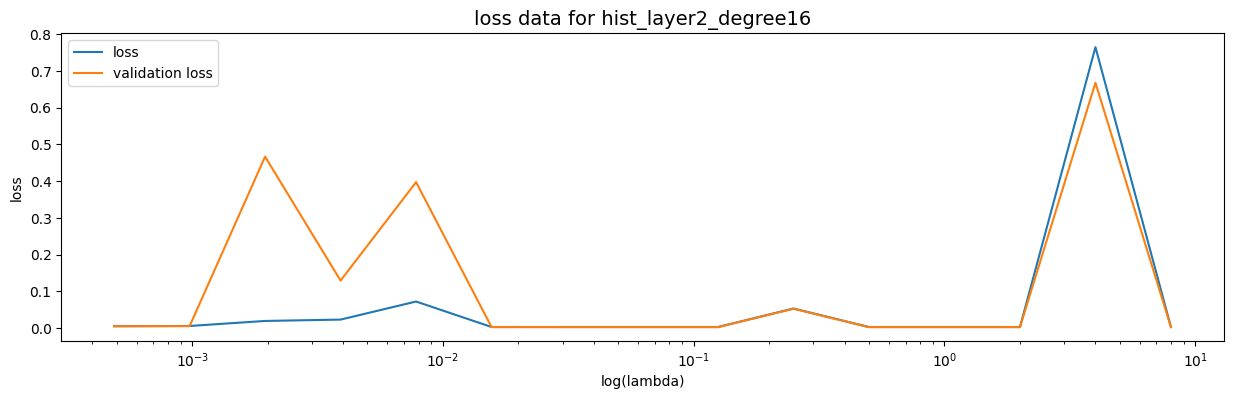

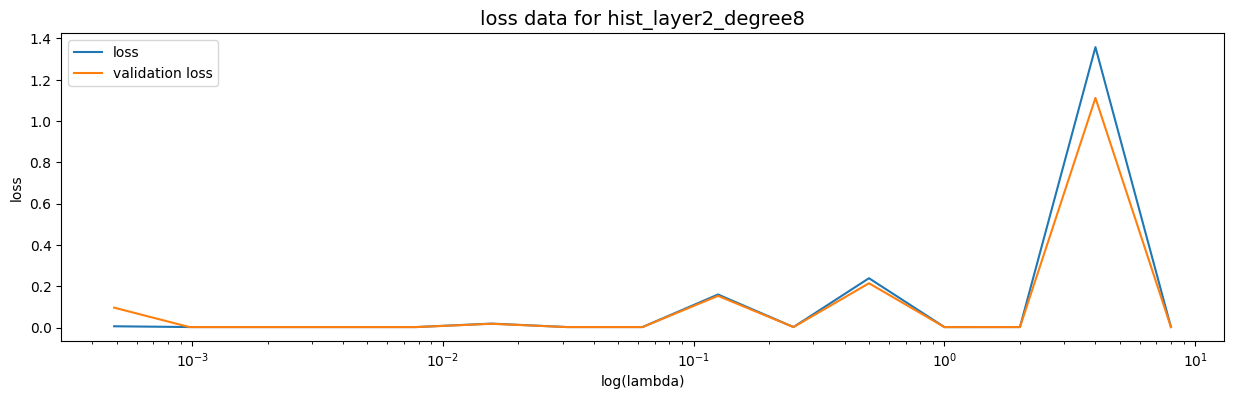

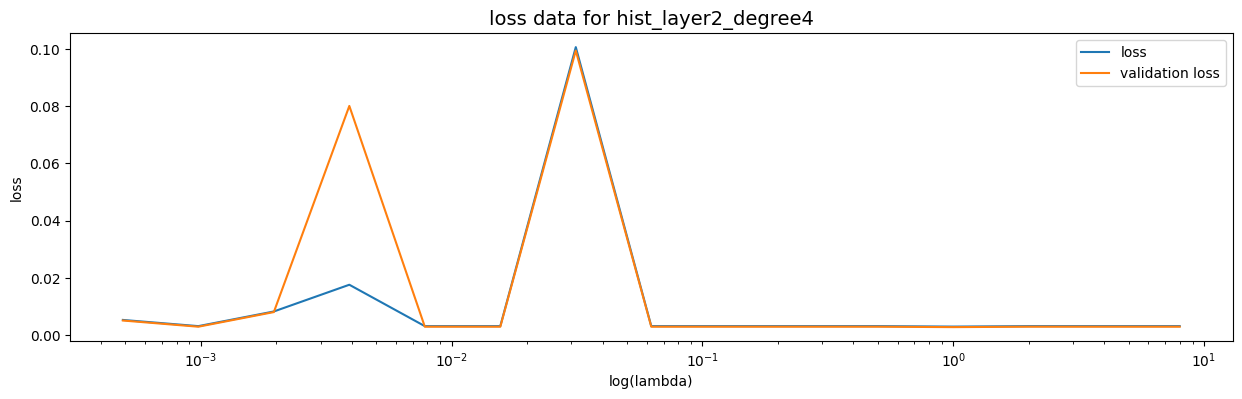

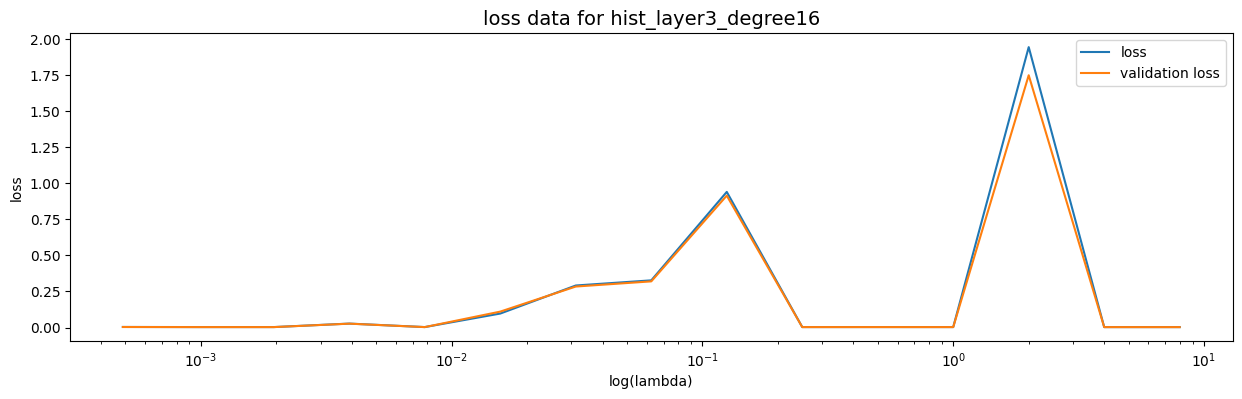

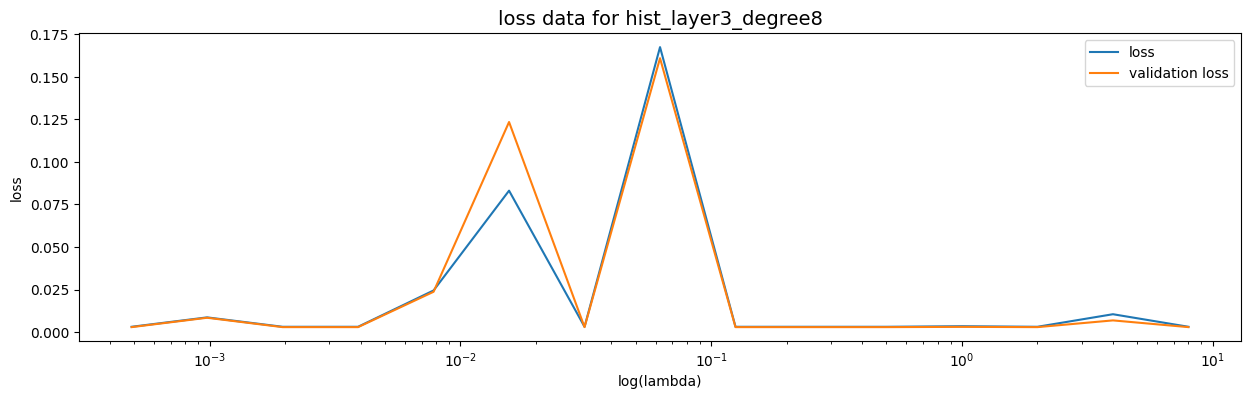

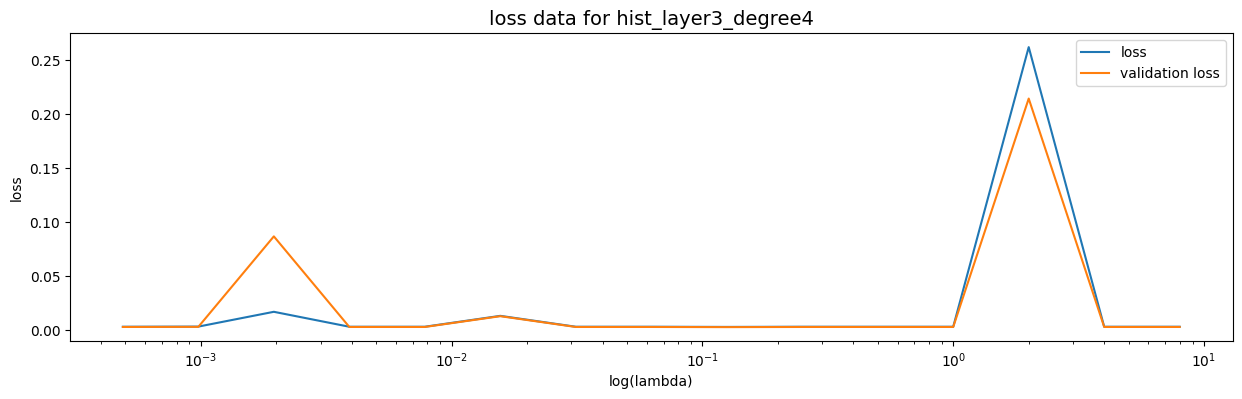

In [231]:
fig_p0, ax_p0 = getPlotLoss( hist_layer2_degree16 , '', 'hist_layer2_degree16')
fig_p0, ax_p0 = getPlotLoss( hist_layer2_degree8 , '', 'hist_layer2_degree8')
fig_p0, ax_p0 = getPlotLoss( hist_layer2_degree4 , '', 'hist_layer2_degree4')
fig_p0, ax_p0 = getPlotLoss( hist_layer3_degree16 , '', 'hist_layer3_degree16')
fig_p0, ax_p0 = getPlotLoss( hist_layer3_degree8 , '', 'hist_layer3_degree8')
fig_p0, ax_p0 = getPlotLoss( hist_layer3_degree4 , '', 'hist_layer3_degree4')

In [230]:
arr = model.predict

NameError: name 'model' is not defined

In [ ]:
model.summary()

In [232]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14382058985293077985
xla_global_id: -1
]


In [233]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

AttributeError: module 'keras.backend' has no attribute 'tensorflow_backend'